# Bank Series

We will propose a relevant and exhaustive market risk analysis of a Bank. The bank is **JP Morgan**

## Import Libraries

In [95]:
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set(rc={"figure.figsize":(15, 8)},style="whitegrid")
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Donwload the data

In [96]:
ticker = 'JPM'
prices = sf.get_data(ticker)

We compute the returns

In [97]:
returns = sf.get_returns(prices)

In [98]:
returns.mean()

0.0007076941513102617

We plot the returns for the bank

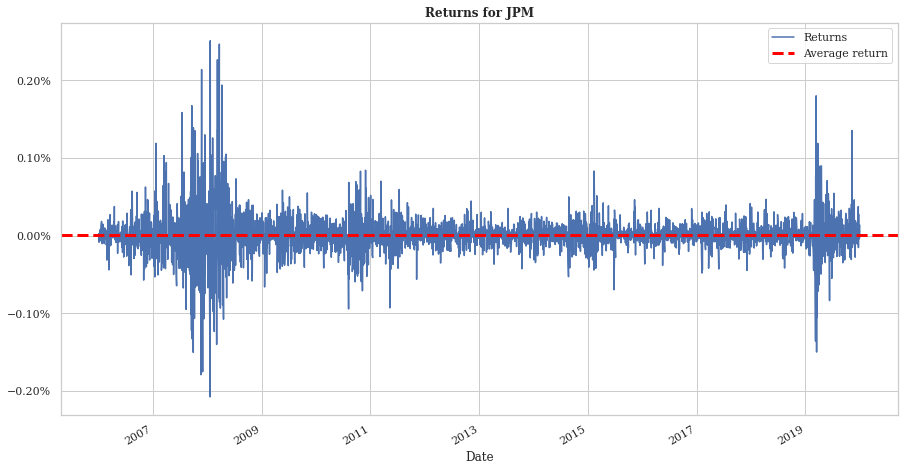

In [99]:
sf.plot_returns(returns, ticker)

## Estimation of the VaR

Qu'est ce que la **VaR** : Une mesure de la perte maximale potentielle sur une période de temps donnée avec une certaine probabilité.

### Non parametric method

Tout d'abord faisons une estimation de la 'Value at Risk' en utilisant une méthode non paramétrique.

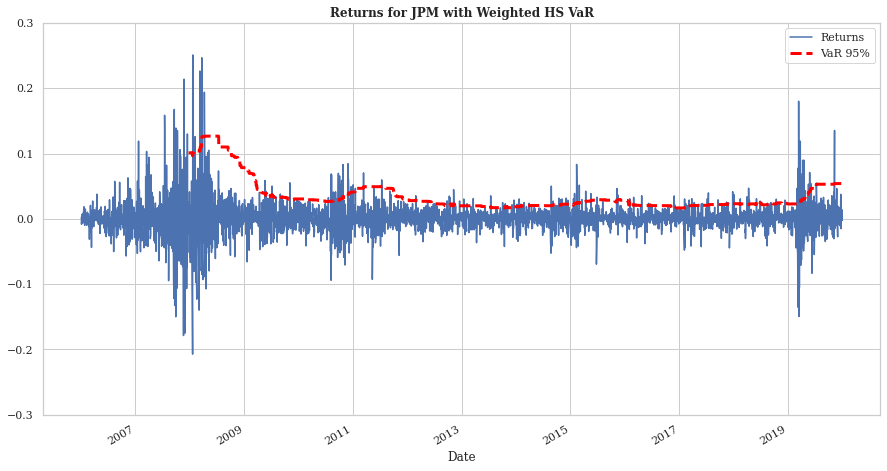

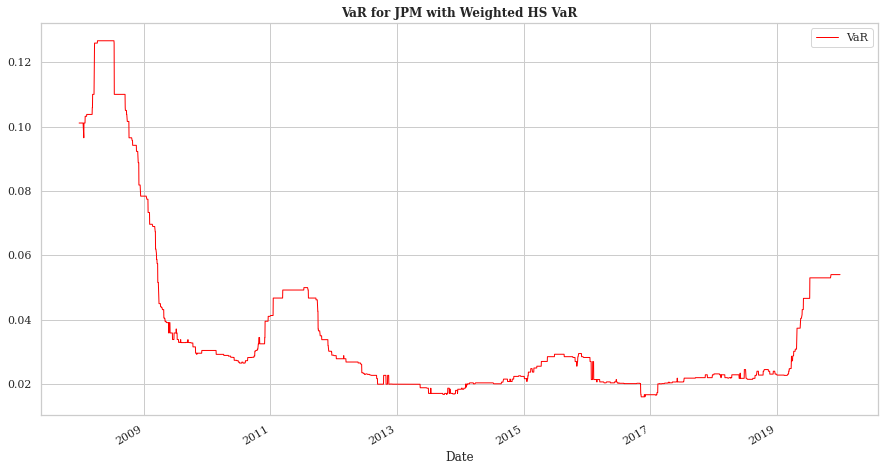

In [100]:
VaR_NonParam = sf.weighted_hs_var(returns=returns, confidence_level=95, window=250, ticker=ticker)

### Parametric method

Tout d'abord faisons une estimation de la 'Value at Risk' en utilisant une méthode paramétrique.

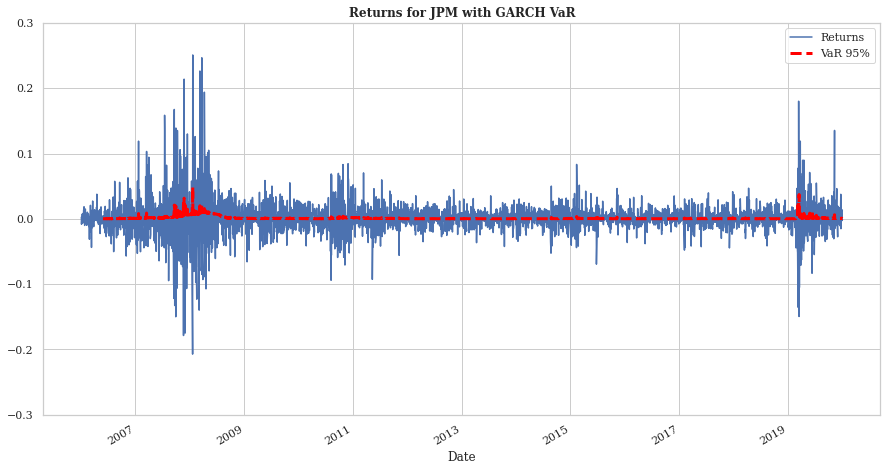

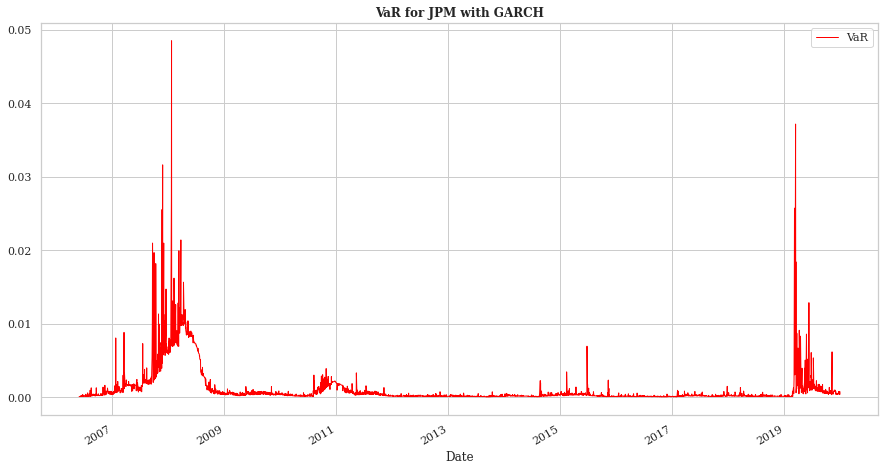

In [101]:
p,q = sf.optimize_garch(returns=returns, bounds=[9,9])
VaR_Param = sf.garch_var(returns=returns, confidence_level=95, p=p, q=q, ticker=ticker, window=100)

In [102]:
type(float(VaR_NonParam.iloc[249]))

float

## Estimation of the ES

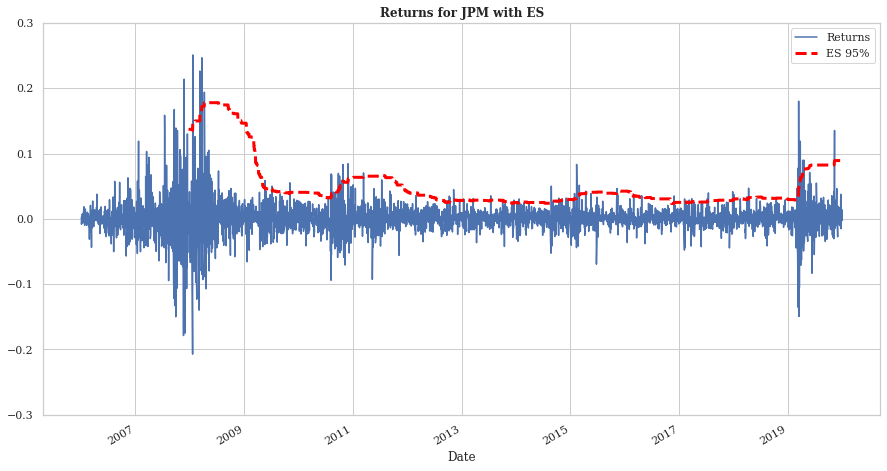

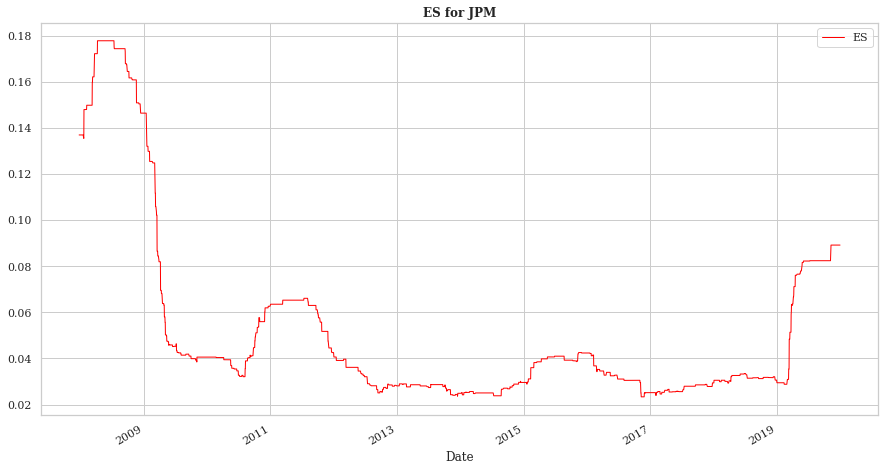

In [103]:
Es = sf.expected_shortfall(returns=returns, confidence_level=95, window=250, ticker=ticker)